In [ ]:
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse
import os.path

In [ ]:
#Load url dataset
df=pd.read_csv("/content/drive/MyDrive/Work_space/Data set/Cyber/function2/malicious_phish.csv")
print(df["type"].value_counts())
df.head(10)

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
df.isnull().sum()

url     0
type    0
dtype: int64

##Data Preproccessing

In [ ]:
!pip install tld
!pip install googlesearch-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for googlesearch-python: filename=googlesearch_python-1.2.3-py3-none-any.whl size=4205 sha256=470d779eff98ad41a7f2b89c2ea1b407864659658facf826ba855e6db748fcac
  Stored in directory: /root/.cache/pip/wheels/98/24/e9/6c225502948c629b01cc895f86406819281ef0da385f3eb669
Successfully built googlesearch-python


In [ ]:
from sklearn.preprocessing import LabelEncoder
from urllib.parse import urlparse
from tld import get_tld

In [ ]:
print(df.shape
      )

(651191, 2)


In [ ]:
df["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
lb_make = LabelEncoder()
df["class_url"] = lb_make.fit_transform(df["type"])
df["class_url"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: class_url, dtype: int64

In [ ]:
def url_length(url):
    return len(str(url))
df['url_length'] = df['url'].apply(lambda i: url_length(i))


def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

def count_www(url):
    url.count('www')
    return url.count('www')
df['count-www'] = df['url'].apply(lambda i: count_www(i))


def count_https(url):
    return url.count('https')
df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')
df['count-http'] = df['url'].apply(lambda i : count_http(i))

def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')
df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')
df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))

def count_atrate(url):
    return url.count('@')
df['count@'] = df['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

df.head()

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0


In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [ ]:
from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))
df.head()

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0,0,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0,0,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0,0,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0,0,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0,0,9,net,3


In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))
df.head()

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,0,0,0,None,-1,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,2,0,0,5,None,-1,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,3,0,0,7,None,-1,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,1,0,0,9,be,2,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,1,0,0,9,net,3,0,22,199


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,0,0,None,-1,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,2,0,0,5,None,-1,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,3,0,0,7,None,-1,0,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,1,0,0,9,be,2,0,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,1,0,0,9,net,3,0,22,199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,3,0,0,7,None,-1,0,12,21,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,4,0,1,8,None,-1,0,7,29,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,4,0,1,7,None,-1,0,3,33,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,2,0,0,4,None,-1,0,0,36,0


In [ ]:
#Use of IP or not in domain
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
df.head()

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,0,None,-1,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,5,None,-1,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,7,None,-1,0,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,0,9,be,2,0,7,63,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,0,9,net,3,0,22,199,1,0


In [ ]:
df['use_of_ip_address'].value_counts()

0    643898
1      7293
Name: use_of_ip_address, dtype: int64

In [ ]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,None,-1,0,0,13,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,5,None,-1,0,1,29,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,7,None,-1,0,1,25,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,9,be,2,0,7,63,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,9,net,3,0,22,199,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,7,None,-1,0,12,21,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,1,8,None,-1,0,7,29,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,1,7,None,-1,0,3,33,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,4,None,-1,0,0,36,0,0,1


In [ ]:
df.isnull().sum()

url                        0
type                       0
class_url                  0
url_length                 0
hostname_length            0
count-www                  0
count-https                0
count-http                 0
count.                     0
count%                     0
count?                     0
count-                     0
count=                     0
count@                     0
count_dir                  0
count_embed_domian         0
short_url                  0
fd_length                  0
tld                   475281
tld_length                 0
sus_url                    0
count-digits               0
count-letters              0
abnormal_url               0
use_of_ip_address          0
google_index               0
dtype: int64

##Training model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['use_of_ip_address','abnormal_url', 'google_index', 'count-www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
           'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters']]

y = df['class_url']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=1)
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (520952, 21)
Y_train Shape : (520952,)
X_test  Shape : (130239, 21)
Y_test  Shape : (130239,)


In [ ]:
print(X_train.values)
print(y_train.values)

[[ 0  0  1 ... -1  0 17]
 [ 0  0  1 ... -1  0 32]
 [ 0  0  1 ... -1  7 31]
 ...
 [ 0  0  1 ... -1  0 39]
 [ 0  0  1 ... -1  0 27]
 [ 0  0  1 ... -1  0 16]]
[0 0 0 ... 0 0 3]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_features='sqrt')
model.fit(X_train.values,y_train.values)


RandomForestClassifier()

In [ ]:
y_pred =model.predict(X_test.values)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84332    12     7  1270]
 [   31 19160    12    89]
 [   33    60  6097   314]
 [ 2421   346    42 16013]]


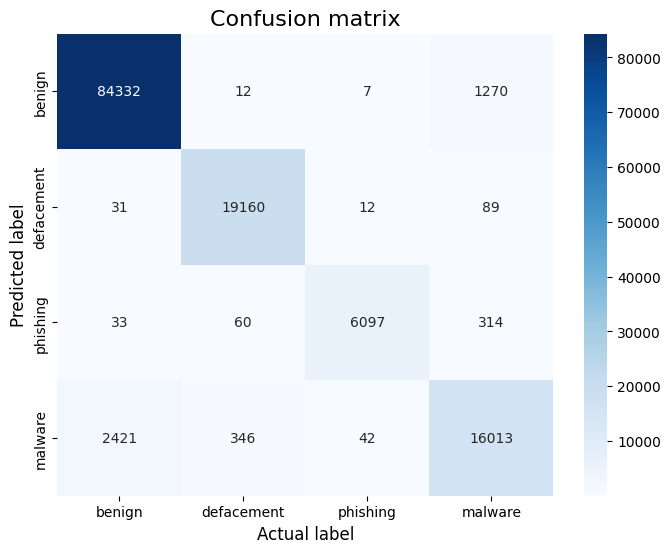

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ["benign","defacement","phishing","malware"]
    # use model to do the prediction
    #y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9643962254009936


In [ ]:
import joblib
# Save the model using joblib
joblib.dump(model, 'URL_detection_random_forest_model.pkl')

['URL_detection_random_forest_model.pkl']

##Get predictions

In [ ]:
# Load the saved model
model = joblib.load('URL_detection_random_forest_model.pkl')

In [ ]:
def get_url(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

In [ ]:
def model_predict(test_url):
    features_test = get_url(test_url)
   # print(features_test)
    features_test = np.array(features_test).reshape((1, -1))
    #print(features_test)

    pred = model.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

In [ ]:
urls = ['www.kaggle.com',
        'en.wikipedia.org/wiki/Main_Page',
        'http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15',
        'bopsecrets.org/rexroth/cr/1.htm',
       'www.stackoverflow.com/questions/',
       'www.google.com/']
for url in urls:
     print(model_predict(url))

Bening
Bening
Defacement
Bening
Bening
Bening
